In [1]:
import pyximport
import numpy as np
pyximport.install(setup_args={"include_dirs": np.get_include()},
                  reload_support=True)
from algorithms.knn_neighborhood import UserKNN
import pandas as pd
from surprise import Dataset, Reader, accuracy, NMF
from surprise.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Read Data

In [2]:
data_df = pd.read_csv("data/ml-100k/u.data", sep="\t")
data_df.columns = ["user_id", "item_id", "rating", "timestamp"]
data_df.drop(columns=["timestamp"], axis=1, inplace=True)

data_df["user_id"] = data_df["user_id"].map({b: a for a, b in enumerate(data_df["user_id"].unique())})
data_df["item_id"] = data_df["item_id"].map({b: a for a, b in enumerate(data_df["item_id"].unique())})

In [3]:
reader = Reader(rating_scale=(1, 5))
dataset = Dataset.load_from_df(data_df, reader=reader)
trainset, testset = train_test_split(dataset, test_size=0.2)

In [4]:
def nqueries(trainset, testset):
    n = np.zeros(trainset.n_users, dtype=np.int)
    for ruid, _, _ in testset:
        iuid = trainset.to_inner_uid(ruid)
        n[iuid] += 1
    return n

In [5]:
def nmentors(trainset, model):
    n = np.zeros(trainset.n_users, dtype=np.int)
    for iuid in trainset.all_users():
        mentors = model.mentors[iuid]
        n[iuid] = len(mentors)
    return n

In [6]:
%matplotlib inline

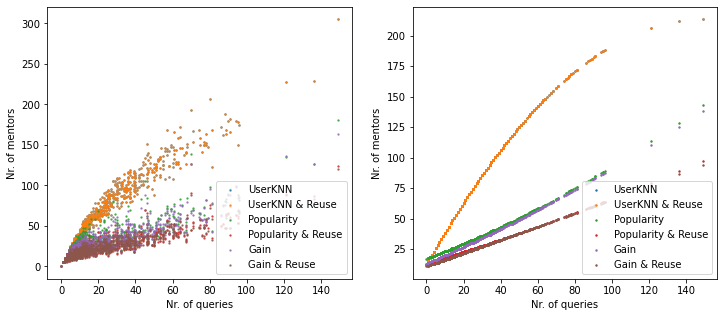

In [8]:
n_queries = nqueries(trainset, testset)

sim = UserKNN.compute_similarities(trainset, min_support=1)
pop = UserKNN.compute_popularities(trainset)
gain = UserKNN.compute_gain(trainset)
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
K = 5

degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

# KNN
model = UserKNN(k=K, precomputed_sim=sim)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="UserKNN")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="UserKNN")

# KNN + reuse
model = UserKNN(k=K, reuse=True, precomputed_sim=sim)
model.fit(trainset)
_ = model.test(testset)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="UserKNN & Reuse")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="UserKNN & Reuse")

# Popularity
model = UserKNN(k=K, precomputed_sim=sim, precomputed_pop=pop, tau_2=0.5)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="Popularity")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="Popularity")

# Popularity + reuse
model = UserKNN(k=K, reuse=True, precomputed_sim=sim, precomputed_pop=pop, tau_2=0.5)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="Popularity & Reuse")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="Popularity & Reuse")


# Gain
model = UserKNN(k=K, precomputed_sim=sim, precomputed_gain=gain, tau_4=0.5)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="Gain")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="Gain")

# Gain + reuse
model = UserKNN(k=K, reuse=True, precomputed_sim=sim, precomputed_gain=gain, tau_4=0.5)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="Gain & Reuse")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="Gain & Reuse")
    
axes[0].set_xlabel("Nr. of queries")
axes[0].set_ylabel("Nr. of mentors")
axes[0].legend(loc="lower right")
axes[1].set_xlabel("Nr. of queries")
axes[1].set_ylabel("Nr. of mentors")
axes[1].legend(loc="lower right")
plt.savefig("plots/mentors/nmentors_k5.png", dpi=300)

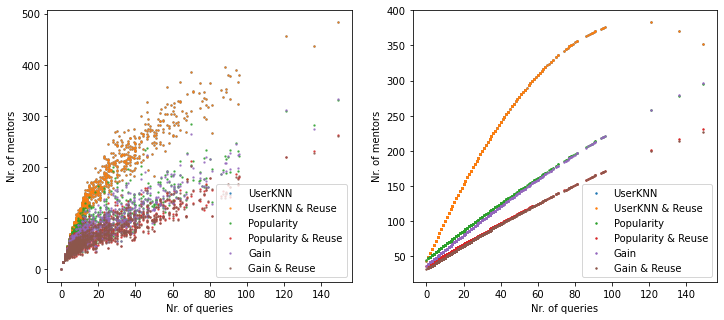

In [9]:
n_queries = nqueries(trainset, testset)

sim = UserKNN.compute_similarities(trainset, min_support=1)
pop = UserKNN.compute_popularities(trainset)
gain = UserKNN.compute_gain(trainset)
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
K = 15

degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

# KNN
model = UserKNN(k=K, precomputed_sim=sim)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="UserKNN")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="UserKNN")

# KNN + reuse
model = UserKNN(k=K, reuse=True, precomputed_sim=sim)
model.fit(trainset)
_ = model.test(testset)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="UserKNN & Reuse")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="UserKNN & Reuse")

# Popularity
model = UserKNN(k=K, precomputed_sim=sim, precomputed_pop=pop, tau_2=0.5)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="Popularity")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="Popularity")

# Popularity + reuse
model = UserKNN(k=K, reuse=True, precomputed_sim=sim, precomputed_pop=pop, tau_2=0.5)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="Popularity & Reuse")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="Popularity & Reuse")


# Gain
model = UserKNN(k=K, precomputed_sim=sim, precomputed_gain=gain, tau_4=0.5)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="Gain")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="Gain")

# Gain + reuse
model = UserKNN(k=K, reuse=True, precomputed_sim=sim, precomputed_gain=gain, tau_4=0.5)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="Gain & Reuse")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="Gain & Reuse")
    
axes[0].set_xlabel("Nr. of queries")
axes[0].set_ylabel("Nr. of mentors")
axes[0].legend(loc="lower right")
axes[1].set_xlabel("Nr. of queries")
axes[1].set_ylabel("Nr. of mentors")
axes[1].legend(loc="lower right")
plt.savefig("plots/mentors/nmentors_k15.png", dpi=300)

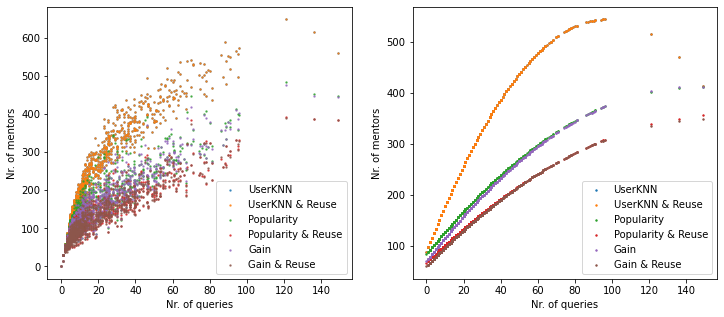

In [10]:
n_queries = nqueries(trainset, testset)

sim = UserKNN.compute_similarities(trainset, min_support=1)
pop = UserKNN.compute_popularities(trainset)
gain = UserKNN.compute_gain(trainset)
    
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
K = 30

degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())

# KNN
model = UserKNN(k=K, precomputed_sim=sim)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="UserKNN")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="UserKNN")

# KNN + reuse
model = UserKNN(k=K, reuse=True, precomputed_sim=sim)
model.fit(trainset)
_ = model.test(testset)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="UserKNN & Reuse")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="UserKNN & Reuse")

# Popularity
model = UserKNN(k=K, precomputed_sim=sim, precomputed_pop=pop, tau_2=0.5)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="Popularity")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="Popularity")

# Popularity + reuse
model = UserKNN(k=K, reuse=True, precomputed_sim=sim, precomputed_pop=pop, tau_2=0.5)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="Popularity & Reuse")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="Popularity & Reuse")


# Gain
model = UserKNN(k=K, precomputed_sim=sim, precomputed_gain=gain, tau_4=0.5)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="Gain")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="Gain")

# Gain + reuse
model = UserKNN(k=K, reuse=True, precomputed_sim=sim, precomputed_gain=gain, tau_4=0.5)
model.fit(trainset)
_ = model.test(testset)
n_mentors = nmentors(trainset, model)
axes[0].scatter(n_queries, n_mentors, s=2, alpha=0.7, label="Gain & Reuse")
polyreg.fit(n_queries.reshape(-1, 1), n_mentors)
axes[1].scatter(n_queries, polyreg.predict(n_queries.reshape(-1, 1)), s=2, label="Gain & Reuse")
    
axes[0].set_xlabel("Nr. of queries")
axes[0].set_ylabel("Nr. of mentors")
axes[0].legend(loc="lower right")
axes[1].set_xlabel("Nr. of queries")
axes[1].set_ylabel("Nr. of mentors")
axes[1].legend(loc="lower right")
plt.savefig("plots/mentors/nmentors_k30.png", dpi=300)